The Business Scenario:
------------------------------------
Freedom Debt Relief’s customers are people who have a substantial amount of debt and because of an unexpected hardship, are no longer able to make their minimum monthly payments.  Upon enrolling in Freedom’s program, customers cease making payments to their creditors and instead make monthly deposits they can afford into a new dedicated bank account.  Over time, the value in this dedicated bank account will grow as they deposit funds each month.  As funds increase, Freedom negotiates one-by-one with each of the client’s creditors to settle their debt, typically at only a fraction of what was originally owed. Once a settlement has been agreed upon on for an individual account, Freedom facilitates payments from the dedicated bank account to the creditor based on the terms of the settlement agreement.  Freedom then collects fees from the client for the individual account that was settled.  Freedom earns fees for each account it successfully negotiates a settlement agreement. Those fees are based on a fixed percentage of the original balance of that account when it was first enrolled in the program.  Because of Freedom’s fee structure, enrolling high debt clients and retaining those clients is important to Freedom’s financial success.  

The Initiative:
---------------------
Starting in 2015, Freedom Debt Relief began to pilot an optional, subscription-based, add-on product to new customers upon enrollment in the program.  We now want to run an analysis to determine the impact of that add-on product.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read client and account Data
acc_data=pd.read_csv('Accounts.csv')
cln_data=pd.read_csv('Clients.csv')

In [6]:
#sample of account data
acc_data.head()

,ClientID,Account,CurrentCreditor,OriginalCreditor,BeginningBalance,SettledFlag,SettlementAmount
0,AFFQB270009,2371827,Creditor G,Creditor G,4652.15,1,2539.9200
1,AFFQB269127,2375652,Creditor G,Creditor G,531.05,1,370.8515
2,KJH2514063,2377175,Creditor G,Creditor G,6012.55,1,3295.8065
3,AFFQB263732,2375455,Creditor H,Creditor H,1069.70,1,619.4000
4,DAS2517163,2376867,Creditor F,Creditor C,4587.55,1,2258.1500


In [4]:
#sample of client data
cln_data.head()

,Client ID,Subscription Product,Program Start Date,Date Closed,Status,Client State,Monthly Income,Welcome Call Complete Date
0,BBG2552533,1,1/16/2015,1/0/1900,Client,AR,2850.0,1/7/2015
1,DHJ2779507,1,6/19/2015,1/0/1900,Client,NY,1140.0,6/11/2015
2,AFFQB276707,0,1/30/2015,1/0/1900,Client,MI,3325.0,1/12/2015
3,AFFQB284149,0,3/20/2015,1/0/1900,Client,FL,4045.1,2/24/2015
4,AFFQB305333,0,6/16/2015,1/0/1900,Client,CA,2945.0,6/4/2015


In [107]:
print("Number of records in account data: ",acc_data.shape[0])
print("Number of records in client data: ",cln_data.shape[0])

Number of records in account data:  79860
Number of records in client data:  28036


In [120]:
def count_by_group(data, feature, target):
    df = data.groupby([feature, target])[target].agg(['count'])
    temp = data.groupby([feature])[target].agg(['count'])
    df['pct'] = 100*df.div(temp, level = feature).reset_index()['count'].values
    return df.reset_index()


The following table and graph show the number of clients in every state with thier status:

Status classes:

o	Client – Still an active client in the program.

o	Completed – Successfully graduated from the program.

o	Rescission – Client left the program prior to starting.

o	Termination – Client left the program after starting.

In [119]:
#Number of client status in every State
count_by_group(cln_data, feature = 'Client State', target = 'Status').head(7)

,Client State,Status,count,pct
0,AK,Client,51,67.105263
1,AK,Completed,4,5.263158
2,AK,Rescission,8,10.526316
3,AK,Terminated,13,17.105263
4,AL,Client,324,56.544503
5,AL,Completed,20,3.490401
6,AL,Rescission,55,9.598604


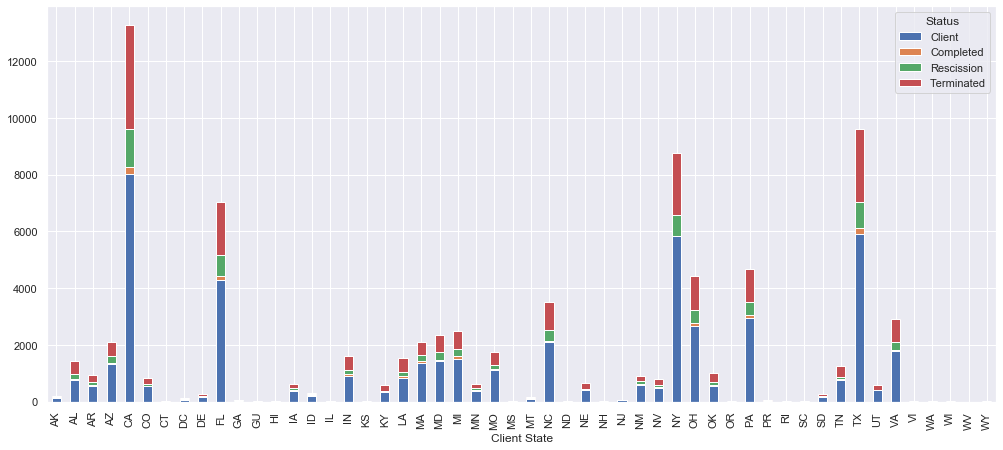

In [117]:
#Number of client in each state with status
data.groupby(['Client State','Status']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

_______________________________________________________________________________

The following table and graph show the relation between Status and Subscription in Product.

This is very important to Freedom Financial and will show if the program is beneficial to Freedom Financial.

In [9]:
#Now let see 
count_by_group(cln_data, feature = 'Status', target = 'Subscription Product')

,Status,Subscription Product,count,pct
0,Client,0,9798,52.468673
1,Client,1,8876,47.531327
2,Completed,0,703,99.716312
3,Completed,1,2,0.283688
4,Rescission,0,1662,74.031180
5,Rescission,1,583,25.968820
6,Terminated,0,3897,60.776669
7,Terminated,1,2515,39.223331


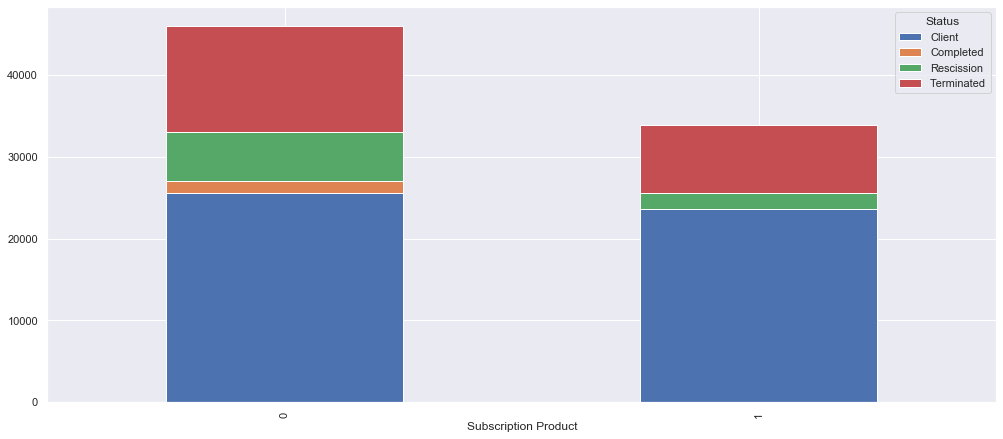

In [122]:
#Number of clients Subscribe in Product with status
data.groupby(['Subscription Product','Status']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

As we see in the above graph see us Subscription in Product reduce number of Client left the program but with low rate. And this may be beneficial to Freedom Financial.

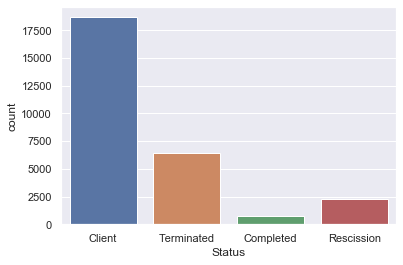

In [12]:
#The distribution of client Status
sns.set(style="darkgrid")
ax = sns.countplot(x="Status", data=cln_data)

The above graph show the distribution of client Status. As we see,the most of  clients are still active in program and the least of clients are completed the program.

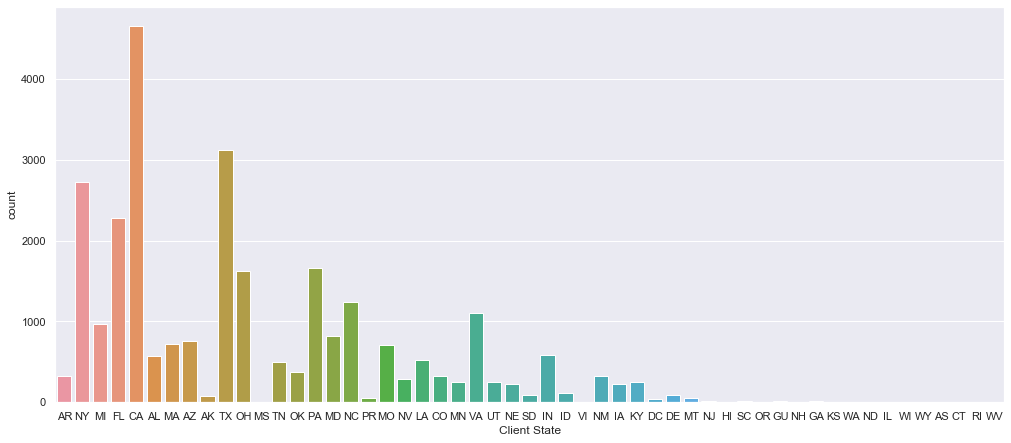

In [16]:
#The distribution of client State
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(17,7.27)})
ax = sns.countplot(x="Client State", data=cln_data)

The above graph show the distribution of of client State in all data. as we see, CA state in the most state in number of clients, followed by TX,NY and FL.

In [18]:
#details of Monthly Income in all data
cln_data['Monthly Income'].describe()

count    28036.000000
mean      3052.808905
std       2202.383115
min          0.000000
25%       1900.000000
50%       2660.000000
75%       3800.000000
max      95000.000000
Name: Monthly Income, dtype: float64

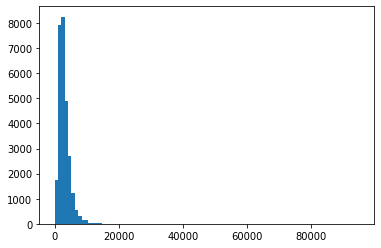

In [20]:
#The distribution of client Monthly Income
plt.hist(cln_data['Monthly Income'],bins=90)
plt.show()

The above data and graph show the distribution of of client Monthly Income in all data. as we see, Monthly Income range from  0 to 95000.

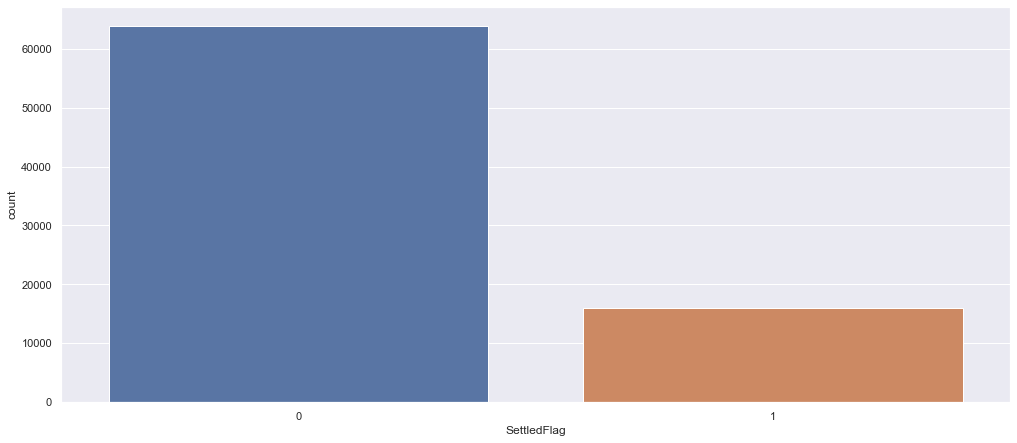

In [28]:
#The distribution of clients that Settled Flag(account settled or not)
sns.set(style="darkgrid")
ax = sns.countplot(x="SettledFlag", data=acc_data)


As we see, there are few number of accounts that have been settled.

1:account has been settled

0:account has not been settled
__________________________________________________________________

New, let see:  
------------------
-Number of accounts that have been settled and have Subscription Product

-Number of accounts that have been settled and don't have Subscription Product

In [42]:
#we need first to merge columns
data = acc_data.merge(cln_data,left_on='ClientID', right_on='Client ID', how='left')

In [45]:
#Now lets see, Subscription in product vs SettledFlag
count_by_group(data, feature = 'SettledFlag', target = 'Subscription Product')

,SettledFlag,Subscription Product,count,pct
0,0,0,36604,57.315546
1,0,1,27260,42.684454
2,1,0,9410,58.827207
3,1,1,6586,41.172793


From the above table we see that:

Number of accounts have been settled and subscribe in Product are 6586.

Number of accounts have been settled and not subscribe in Product are 9410. 

Number of accounts have been not settled and subscribe in Product are 27260. 

Number of accounts have been not settled and not subscribe in Product are 36604. 
_______________________________________________________________________________

--The number of acounts that not subscribe in this program and have been settled is bigger, so may be this program is not very beneficial to customers.

--The below graph illustrate more about the relation between SettledFlag and Subscription in Product.


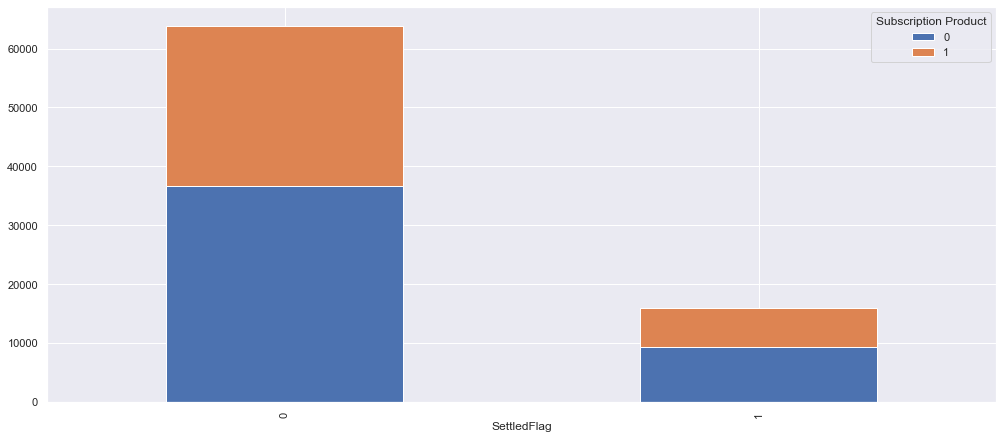

In [52]:
data.groupby(['SettledFlag','Subscription Product']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

--The below graph illustrate the relation between Settled account and Status. 


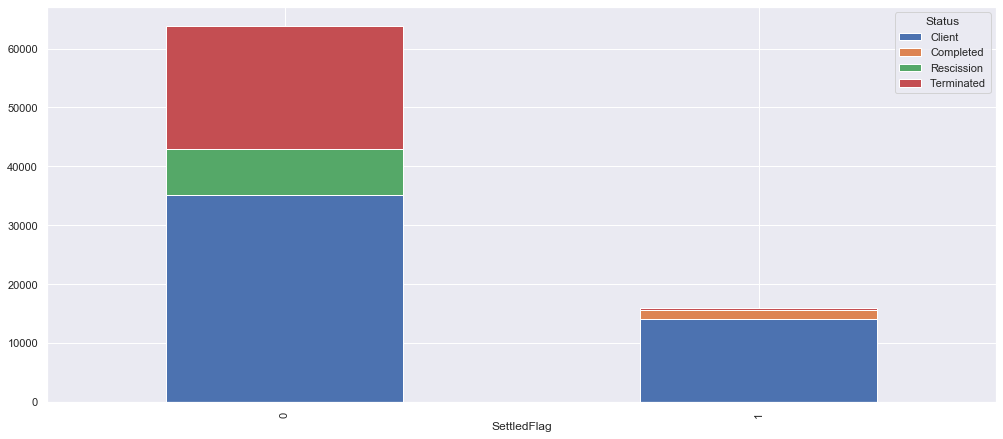

In [105]:
data.groupby(['SettledFlag','Status']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [62]:
#Each client may has multiple accounts. 
#These are accounts for client with id=AFFQB270009 
data[data['ClientID']=='AFFQB270009']

,ClientID,Account,CurrentCreditor,OriginalCreditor,BeginningBalance,SettledFlag,SettlementAmount,Client ID,Subscription Product,Program Start Date,Date Closed,Status,Client State,Monthly Income,Welcome Call Complete Date
0,AFFQB270009,2371827,Creditor G,Creditor G,4652.15,1,2539.92,AFFQB270009,0,1/15/2015,1/0/1900,Client,MD,2375.0,11/26/2014
58188,AFFQB270009,2371828,Creditor G,Creditor G,2114.70,0,NaN,AFFQB270009,0,1/15/2015,1/0/1900,Client,MD,2375.0,11/26/2014
58189,AFFQB270009,2371822,Creditor G,Creditor G,10856.60,0,NaN,AFFQB270009,0,1/15/2015,1/0/1900,Client,MD,2375.0,11/26/2014
58190,AFFQB270009,2371823,Creditor B,Creditor B,9756.50,0,NaN,AFFQB270009,0,1/15/2015,1/0/1900,Client,MD,2375.0,11/26/2014
58191,AFFQB270009,2371824,Creditor C,Creditor C,7151.60,0,NaN,AFFQB270009,0,1/15/2015,1/0/1900,Client,MD,2375.0,11/26/2014
58192,AFFQB270009,2371826,Creditor G,Creditor G,4675.90,0,NaN,AFFQB270009,0,1/15/2015,1/0/1900,Client,MD,2375.0,11/26/2014


This graph illustrate accounts to be settle or not in accounts that have Subscription in product.

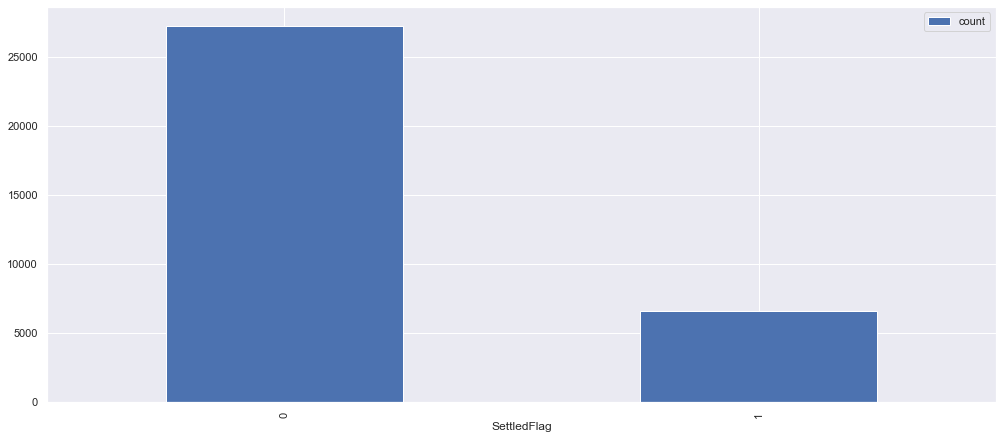

In [109]:
data[data['Subscription Product']==1].groupby(['SettledFlag'])['ClientID'].agg(['count']).plot(kind='bar')

This graph illustrate accounts to be settle or not in accounts that not have Subscription in product.

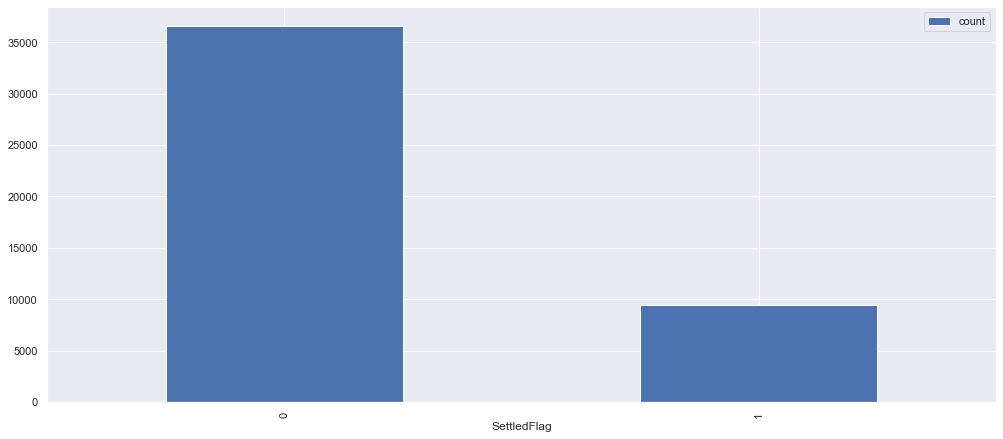

In [110]:
data[data['Subscription Product']==0].groupby(['SettledFlag'])['ClientID'].agg(['count']).plot(kind='bar')

Now, let see what is happend to Settled accounts if client has Subscription Product or not has Subscription Product?. 

By groub every client accounts and calculate ratio of his accounts to be Settled if he has Subscription Product. 
After obtain all ratios from all clients, calculate the ratio of all clients has Subscription Product.

Each client have many accounts, he has some Settled accounts and some not,using groub by to sum all SettledFlag that is 0 for not Settled accounts and 1 for Settled accounts and divide the result by count of all his accounts.

After obtain ratio for every client to accounts to be Settled, we will sum all ratios and divide the result on number client records.

EX: if client have 5 accounts and one Settled account . The ratio will be 1/5.
say all number of clients have Subscription Product is 1000. we will sum all ratios these clients and divide by 1000. 


In [150]:
'''this is The ratio for every client of Settled accounts and total accounts
    if client has Subscription Product'''
sub_df=data[(data['Subscription Product']==1)].groupby(['ClientID'])['SettledFlag'].sum()/data[(data['Subscription Product']==1)].groupby(['ClientID'])['SettledFlag'].count()
sub_df.head()

ClientID
ACT2520099    0.333333
ACT2525506    0.400000
ACT2550291    0.500000
ACT2550501    0.333333
ACT2550718    1.000000
Name: SettledFlag, dtype: float64

In [144]:
#The rate for all clients if they Subscribe in product
sub_df.sum()/len(sub_df)

0.21097487696025116

After obtain The rate of Settled accounts if clients Subscribe in product.

We will do the same thing with data of clients have not Subscription Product.

In [151]:
'''this is The ratio for every client of Settled accounts and total accounts
    if client has not Subscription Product'''
not_sub_df=data[(data['Subscription Product']==0)].groupby(['ClientID'])['SettledFlag'].sum()/data[(data['Subscription Product']==0)].groupby(['ClientID'])['SettledFlag'].count()
not_sub_df.head()

ClientID
ACT2545833    0.333333
ACT2550900    0.000000
ACT2555427    1.000000
ACT2557041    0.000000
ACT2559728    1.000000
Name: SettledFlag, dtype: float64

In [152]:
#The rate for all users if they not Subscribe in product
not_sub_df.sum()/len(not_sub_df)

0.2358499205380065

Form the above data, we see that the rate of Settled accounts not changed if client has or not has Subscription Product.

Conclusion
-----------------
•Based on the distribution of client Status, the active clients in the program are the most number of clients.

•Although there are states that have more number of clients like, CA in the most state in number of clients, followed by TX,NY and FL. But the distribution of clients Status in every state is nearly the same.

•The number of accounts that have been not settled is much more the accounts that have been settled.

•The number of acounts that are not subscribe in this program and have been settled is bigger. And The rate of Settled accounts not changed if client has or not has Subscription Product. So may be this program is not very beneficial to customers.

•As we see in the above graph see us Subscription in Product reduce number of Client left the program but with low rate. And this may be beneficial to Freedom Financial.

•As the product is not affect on the rate of account to be Settled, We don't recommend clients to subscribe in it, Although the product have some beneficial to Freedom Financial.